# Assignment 3

## Q2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(style = "darkgrid")
import matplotlib.style as mplstyle
mplstyle.use(['dark_background', 'ggplot', 'fast'])

In [2]:
X = np.array([1, 3, 6]).reshape([-1, 1])
y = np.array([6, 10, 16]).reshape([-1, 1])

** a) Linear Regression using Sklearn**

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [4]:
reg.coef_

array([[2.]])

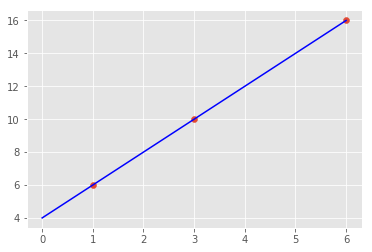

In [5]:
plt.scatter(X, y)
plt.plot(np.arange(7), reg.predict(np.arange(7).reshape([-1, 1])), color = 'b')
plt.show()

** b) Linear Regression new X and y using Sklearn **

In [6]:
X = np.array([1,2,2,4,3,6,4,8]).reshape([4, 2])
y = np.array([2,3,4,5]).reshape([-1, 1])

In [7]:
y

array([[2],
       [3],
       [4],
       [5]])

In [8]:
reg2 = LinearRegression()
reg2.fit(X, y)
reg2.coef_

array([[0.2, 0.4]])

** Working Perfectly fine with Sklearn because it does SV decomposition**

In [9]:
def NormalEquationRegression(X, y):
    one = np.ones(X.shape[0]).reshape([-1, 1])
    X = np.concatenate((one, X), axis = 1)
    XXT = np.matmul(np.transpose(X), X)
    XXTY = np.matmul(np.linalg.inv(XXT+alpha*np.indentity(X.shape[0])), np.transpose(X))
    reg = np.matmul(XXTY, y)
    return reg

In [10]:
print(NormalEquationRegression(X, y))

LinAlgError: Singular matrix

** Did not worked because inverse doesn't exist for one of the matrix**

## Q3: Real Estate Prediction problem

In [11]:
data = pd.read_excel("Real estate valuation data set.xlsx")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [12]:
data.head()
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values
# sns.pairplot(data.iloc[:, 2:])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [13]:
reg3 = LinearRegression()
reg3.fit(X_train, y_train)
reg3.coef_

array([ 6.14448467e+00, -2.68206471e-01, -4.15899608e-03,  1.11718716e+00,
        2.25982906e+02, -2.52590668e+00])

In [14]:
y_pred = reg3.predict(X_test)

** RMSE error for sklearn linear regression **

In [15]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("test RMSE: " + str(rmse))

rmse_train = np.sqrt(mean_squared_error(reg3.predict(X_train), y_train))
print("train RMSE: " + str(rmse_train))

test RMSE: 8.336848574083264
train RMSE: 8.910994240894988


#### Checking the coefficient

In [16]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [17]:
reg3.coef_

array([ 6.14448467e+00, -2.68206471e-01, -4.15899608e-03,  1.11718716e+00,
        2.25982906e+02, -2.52590668e+00])

** Some coefficients have very high value when compared to others **

** Scaling the data **

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

** Scaled X **

In [19]:
X

array([[0.27272729, 0.73059361, 0.00951267, 1.        , 0.61694135,
        0.71932284],
       [0.27272729, 0.44520548, 0.04380939, 0.9       , 0.5849491 ,
        0.71145137],
       [1.        , 0.30365297, 0.08331505, 0.5       , 0.67123122,
        0.75889584],
       ...,
       [0.63636365, 0.42922374, 0.05686115, 0.7       , 0.57149782,
        0.71522536],
       [0.36363635, 0.18493151, 0.0125958 , 0.5       , 0.42014057,
        0.72395946],
       [0.90909094, 0.14840183, 0.0103754 , 0.9       , 0.51211827,
        0.75016174]])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

In [21]:
reg4 = LinearRegression()
reg4.fit(X_train, y_train)
reg4.coef_

y_pred = reg4.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("test RMSE: " + str(rmse))

rmse_train = np.sqrt(mean_squared_error(reg4.predict(X_train), y_train))
print("train RMSE: " + str(rmse_train))

test RMSE: 8.744335384833603
train RMSE: 8.84415853378926


In [23]:
reg4.coef_

array([  6.23732136, -12.04822992, -25.10044332,  11.66489368,
        18.3173235 ,   1.28035352])

** Coefficients are scaled well **

### Residual Plots

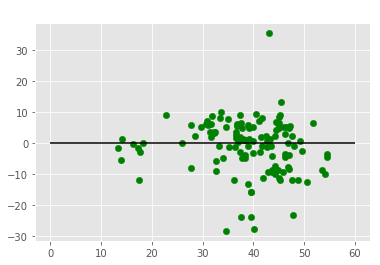

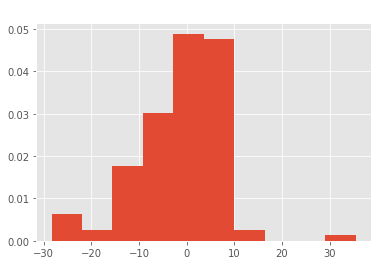

In [24]:
%matplotlib inline
plt.scatter(y_pred, y_pred - y_test, c = 'g', s = 40)
plt.hlines(y = 0, xmin=0, xmax=60)
plt.title("Residual Plot")
plt.show()
plt.hist(y_pred-y_test, density = True)
plt.title("Residual Distribution")
plt.show()

** Finding Optimal features using all possible combinations **

In [25]:
from itertools import combinations
mini = 99999
features = None
arr = range(6)

for i in range(1,7):
    for j in combinations(arr, i):
        reg = LinearRegression()
        reg.fit(X_train[:, j], y_train)
        RMSE = np.sqrt(mean_squared_error(reg.predict(X_test[:, list(j)]), y_test))
        if(RMSE < mini):
            mini = RMSE
            features = j
        

In [26]:
mini

8.603306902250354

** Important Features **

In [27]:
features

(1, 2, 3, 4)

**  Forward Selection **

In [28]:
def ForwardSelection(X_train, X_test, y_train, y_test):
    cols = range(X.shape[1])
    num = 1
    mini = 99999
    features = None
    
    for i in cols:
        reg = LinearRegression()
        reg.fit(X_train[:, [i]], y_train)
        RMSE = np.sqrt(mean_squared_error(reg.predict(X_test[:, [i]]), y_test))
        if(RMSE < mini):
            mini = RMSE
            features = [i]
#         print i
    print(features, RMSE)
    num = 1
    
    while(num != 4):
        cols = []
        num = num + 1
        for j in combinations(arr, num):
            if(all(elem in j for elem in features)):
                cols.append(j)
        for i in cols:
#             print i
            reg = LinearRegression()
            reg.fit(X_train[:, i], y_train)
            RMSE = np.sqrt(mean_squared_error(reg.predict(X_test[:, i]), y_test))
            if(RMSE < mini):
                mini = RMSE
                features = i
        print(features, RMSE)

In [29]:
ForwardSelection(X_train,X_test, y_train, y_test)

[2] 11.296153000146196
(1, 2) 9.579383034983467
(1, 2, 3) 9.280448380147233
(1, 2, 3, 4) 8.908331438464796


## Q4

** Normal Equation Regression **

In [30]:
import time
def NormalEquationRegression(X, y):
    one = np.ones(X.shape[0]).reshape([-1, 1])
    X = np.concatenate((one, X), axis = 1)
    XXT = np.matmul(np.transpose(X), X)
    XXTY = np.matmul(np.linalg.inv(XXT), np.transpose(X))
    reg = np.matmul(XXTY, y)
    return reg
    

In [31]:
a = time.time()
reg = NormalEquationRegression(X_train, y_train)
b = time.time() - a
b

0.0006799697875976562

In [32]:
reg

array([ 29.58841599,   6.23732136, -12.04822992, -25.10044332,
        11.66489368,  18.3173235 ,   1.28035352])

** Gradient Descent Regression **

In [33]:
def gradientDescentRegression(X, y, alpha = 0.1):
    w = np.zeros(X.shape[1]+1)
    
    X = np.concatenate((np.ones(X.shape[0]).reshape([-1, 1]), X), axis = 1)
    for i in range(10000):
        y_ = np.matmul(X, w)
        errors = alpha*np.subtract(y_,y)
        w = np.subtract(w, (2*np.matmul(X.T, errors))/len(X))
    return w

In [34]:
a = time.time()
reg = gradientDescentRegression(X_train, y_train)
b = time.time() - a
print(b)
print(reg)

0.17652559280395508
[ 29.58027107   6.23733285 -12.04804137 -25.09228226  11.66576327
  18.32056951   1.28787584]


** Gradient Descent Autograd Regression **

In [38]:
X = np.arange(0,50,5).reshape((-1,1))
y = 2*X+3

In [39]:
from autograd import grad

def c(weights):
    global X,y
    X_ = np.concatenate((np.ones(X.shape[0]).reshape([-1, 1]), X), axis = 1)
    pred = np.dot(X_,weights)
    
    
    return np.sum(np.square(pred - y))/len(X_)



def gradientDescentAutogradRegression(alpha = 0.1):
    
    training_gradient_fun = grad(c)
    weights = np.zeros((X.shape[1]+1,1))
    print("Initial loss:", c(weights))
    
    for i in range(100):
    
        weights -= training_gradient_fun(weights) * alpha
#         print (i,training_loss(weights))
        
    return weights




In [40]:
a = time.time()
weights = gradientDescentAutogradRegression(.00001)
print(time.time() - b)
print(weights)

Initial loss: 3129.0
1549892169.70347
[[0.05209249]
 [1.59517509]]


** Gradient Descent Pytorch Regression **

In [41]:
import torch
from torch.autograd import Variable

def gradientDescentPyTorchRegression(X, y, alpha = 0.001):
#     print "X"
    
    torch.manual_seed(10)
    
    
    X = np.concatenate((np.ones(X.shape[0]).reshape([-1, 1]), X), axis = 1)
    X = torch.from_numpy(X)
    y = torch.from_numpy(y)
    X = X.type(torch.FloatTensor)
    y = y.type(torch.FloatTensor)
    w = torch.randn(X.shape[1], 1)
    w.requires_grad = True

    
    for i in range(1000):
        y_pred = X.mm(w)

        loss = (y_pred - y).pow(2).mean()
        print(i, loss.item())
        loss.backward()

        with torch.no_grad():
            w = w - alpha * w.grad

        w.requires_grad = True
    return w

a = time.time()
w = gradientDescentPyTorchRegression(X_train, y_train)
print(time.time()-a)

0 1710.78271484375
1 1697.2086181640625
2 1683.757568359375
3 1670.4290771484375
4 1657.2215576171875
5 1644.1337890625
6 1631.1649169921875
7 1618.313720703125
8 1605.5797119140625
9 1592.9608154296875
10 1580.456787109375
11 1568.06591796875
12 1555.787841796875
13 1543.62109375
14 1531.564697265625
15 1519.6181640625
16 1507.77978515625
17 1496.048828125
18 1484.424560546875
19 1472.906005859375
20 1461.49169921875
21 1450.18115234375
22 1438.9735107421875
23 1427.866943359375
24 1416.86181640625
25 1405.956787109375
26 1395.1500244140625
27 1384.442138671875
28 1373.830810546875
29 1363.3160400390625
30 1352.89697265625
31 1342.5721435546875
32 1332.34130859375
33 1322.2032470703125
34 1312.1572265625
35 1302.2027587890625
36 1292.3380126953125
37 1282.563232421875
38 1272.8770751953125
39 1263.2789306640625
40 1253.7679443359375
41 1244.3428955078125
42 1235.0040283203125
43 1225.74951171875
44 1216.5791015625
45 1207.4920654296875
46 1198.4874267578125
47 1189.564453125
48 1180.7

413 248.9855499267578
414 248.6658477783203
415 248.34898376464844
416 248.03494262695312
417 247.7237091064453
418 247.4152374267578
419 247.10951232910156
420 246.80654907226562
421 246.5062255859375
422 246.20858764648438
423 245.91360473632812
424 245.62124633789062
425 245.33145141601562
426 245.0442352294922
427 244.75965881347656
428 244.47747802734375
429 244.19789123535156
430 243.92076110839844
431 243.64610290527344
432 243.37388610839844
433 243.10403442382812
434 242.83660888671875
435 242.57159423828125
436 242.308837890625
437 242.04844665527344
438 241.7904052734375
439 241.53460693359375
440 241.28111267089844
441 241.0298309326172
442 240.78073120117188
443 240.53395080566406
444 240.28924560546875
445 240.04676818847656
446 239.80642700195312
447 239.56817626953125
448 239.33209228515625
449 239.09805297851562
450 238.86605834960938
451 238.6361541748047
452 238.4082794189453
453 238.18240356445312
454 237.9585723876953
455 237.7366180419922
456 237.51669311523438
45

819 212.83816528320312
820 212.8246307373047
821 212.81117248535156
822 212.79776000976562
823 212.7844696044922
824 212.77122497558594
825 212.758056640625
826 212.74493408203125
827 212.73191833496094
828 212.71888732910156
829 212.7060089111328
830 212.6931610107422
831 212.68035888671875
832 212.66769409179688
833 212.65501403808594
834 212.64242553710938
835 212.62989807128906
836 212.61749267578125
837 212.60508728027344
838 212.59274291992188
839 212.58047485351562
840 212.56826782226562
841 212.55612182617188
842 212.54405212402344
843 212.5320281982422
844 212.5200653076172
845 212.50811767578125
846 212.4962615966797
847 212.48448181152344
848 212.47271728515625
849 212.46107482910156
850 212.44940185546875
851 212.43785095214844
852 212.42633056640625
853 212.4148712158203
854 212.4034423828125
855 212.39212036132812
856 212.38076782226562
857 212.3695068359375
858 212.3583221435547
859 212.34716796875
860 212.33609008789062
861 212.32504272460938
862 212.31402587890625
863 

** Normal Equations gives the fastest result while auto grad version is the slowest **

## Q5

** Polynomial Regression **

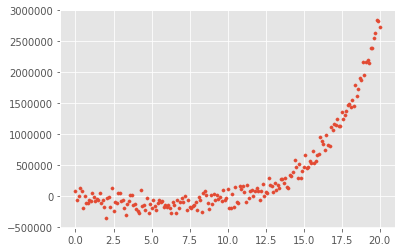

In [42]:
import numpy as np
x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
y = 1*x**5 + 3*x**4 - 100*x**3 + 8*x**2 -300*x - 1e5 + np.random.randn(len(x))*1e5

plt.scatter(x, y, s = 10)



In [43]:
def polynomialRegression(x, y, p):
    X = x.reshape([-1, 1])
    x = X[:]
    for i in range(2,p+1):
        X = np.concatenate((X, x**i), axis = 1)
#     X = np.concatenate((np.ones(X.shape[0]).reshape([-1, 1]), X), axis = 1)
    return NormalEquationRegression(X, y)
    

In [44]:
polynomialRegression(x, y, 4) # for p = 4

array([ 5.29201684e+04, -1.26089185e+05,  2.78067073e+04, -2.48850506e+03,
        8.78523715e+01])

In [45]:
polynomialRegression(x, y, 5) # for p = 5

array([ 8.82345685e+03, -5.75536517e+04,  3.57964583e+03,  7.53760679e+02,
       -9.47499055e+01,  3.65204554e+00])

In [46]:
theta0 = np.arange(-15, 15, 0.2)
theta1 = np.arange(-15, 15, 0.2)

x_axis, y_axis = np.meshgrid(theta0, theta1)

In [47]:
Z = []
x = np.array([1, 3, 6]).reshape([-1, 1])
y = np.array([6, 10, 16]).reshape([-1, 1])
for i in theta0:

    for j in theta1:
        Z.append(np.sum((np.subtract((j*x + i), y))**2))

In [48]:
Z = np.array(Z).reshape(x_axis.shape)

In [1]:

import plotly.plotly as py
import plotly.graph_objs as go

data = [
     go.Contour(
        z=Z,
         x = theta0, y = theta1, 
        colorscale='Jet'
    )]
py.iplot(data)

NameError: name 'Z' is not defined

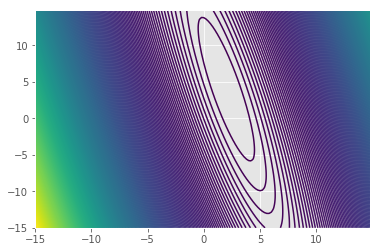

In [50]:
plt.contour(x_axis, y_axis, Z, 300)
plt.show()

In [51]:
# {'x': [3, 4], 'y': [3, 4]}

import torch
from torch.autograd import Variable
li = []
def gradientDescentPyTorchRegression(X, y, alpha = 0.001):
#     print "X"
    
    torch.manual_seed(10)
    
    x = X[:].flatten()
    X = np.concatenate((np.ones(X.shape[0]).reshape([-1, 1]), X), axis = 1)
    X = torch.from_numpy(X)
    y = torch.from_numpy(y)
    X = X.type(torch.FloatTensor)
    y = y.type(torch.FloatTensor)
    w = torch.randn(X.shape[1], 1)
    w.requires_grad = True

#     print X, y, w
    
    for i in range(1000):
        y_pred = X.mm(w)
        
        loss = (y_pred - y).pow(2).mean()
        print(i, loss.item())
        loss.backward()

        with torch.no_grad():
            w = w - alpha * w.grad
        y_ = y_pred.data.numpy().flatten()
        w.requires_grad = True
        li.append({'data': [{'x':x, 'y':y_}]})
    return w


x = np.array([1, 3, 6]).reshape([-1, 1])
y = np.array([6, 10, 16]).reshape([-1, 1])

gradientDescentPyTorchRegression(x, y)

# {'data': [{'x': [1, 2], 'y': [1, 4, ]}]}

0 252.7008056640625
1 236.95887756347656
2 222.21238708496094
3 208.3983612060547
4 195.457763671875
5 183.33543395996094
6 171.9795684814453
7 161.3417205810547
8 151.3764190673828
9 142.04119873046875
10 133.29615783691406
11 125.10399627685547
12 117.42972564697266
13 110.24059295654297
14 103.50594329833984
15 97.19696807861328
16 91.28680419921875
17 85.75019073486328
18 80.56352996826172
19 75.70465850830078
20 71.15287017822266
21 66.88873291015625
22 62.894046783447266
23 59.15177536010742
24 55.64595031738281
25 52.36162185668945
26 49.2847785949707
27 46.40229415893555
28 43.701873779296875
29 41.1720085144043
30 38.801918029785156
31 36.581485748291016
32 34.501251220703125
33 32.552337646484375
34 30.726449966430664
35 29.01580238342285
36 27.41310691833496
37 25.911535263061523
38 24.50469207763672
39 23.186594009399414
40 21.951614379882812
41 20.794504165649414
42 19.710344314575195
43 18.694503784179688
44 17.742677688598633
45 16.850812911987305
46 16.01511573791504
47

495 2.3051931858062744
496 2.3027710914611816
497 2.300352096557617
498 2.2979352474212646
499 2.2955214977264404
500 2.2931082248687744
501 2.290698766708374
502 2.2882936000823975
503 2.285888433456421
504 2.2834866046905518
505 2.281087875366211
506 2.2786920070648193
507 2.276296854019165
508 2.2739055156707764
509 2.2715160846710205
510 2.269129753112793
511 2.2667453289031982
512 2.264364719390869
513 2.2619857788085938
514 2.259608030319214
515 2.2572343349456787
516 2.254863977432251
517 2.2524948120117188
518 2.2501273155212402
519 2.2477643489837646
520 2.245401620864868
521 2.2430431842803955
522 2.2406857013702393
523 2.2383320331573486
524 2.2359797954559326
525 2.2336313724517822
526 2.2312846183776855
527 2.2289392948150635
528 2.2265985012054443
529 2.2242591381073
530 2.2219221591949463
531 2.219587564468384
532 2.2172563076019287
533 2.2149264812469482
534 2.212599515914917
535 2.210275411605835
536 2.2079522609710693
537 2.2056329250335693
538 2.203315019607544
539 2

933 1.4546159505844116
934 1.4530863761901855
935 1.451560378074646
936 1.4500356912612915
937 1.4485117197036743
938 1.4469900131225586
939 1.445469856262207
940 1.4439510107040405
941 1.4424346685409546
942 1.4409180879592896
943 1.4394044876098633
944 1.4378923177719116
945 1.4363816976547241
946 1.4348726272583008
947 1.4333643913269043
948 1.4318594932556152
949 1.430355429649353
950 1.4288517236709595
951 1.427350640296936
952 1.4258508682250977
953 1.4243531227111816
954 1.4228572845458984
955 1.4213613271713257
956 1.4198681116104126
957 1.4183769226074219
958 1.4168858528137207
959 1.4153976440429688
960 1.413909912109375
961 1.4124245643615723
962 1.4109407663345337
963 1.4094589948654175
964 1.4079780578613281
965 1.4064979553222656
966 1.4050216674804688
967 1.4035450220108032
968 1.4020695686340332
969 1.400597095489502
970 1.3991254568099976
971 1.3976558446884155
972 1.3961868286132812
973 1.394720435142517
974 1.3932546377182007
975 1.3917902708053589
976 1.390328049659

tensor([[1.7820],
        [2.4906]], requires_grad=True)

In [56]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [59]:

from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

init_notebook_mode(connected=True)

figure = {'data': [{'x': x.flatten(), 'y': y.flatten()}],
          'layout': {'xaxis': {'range': [0, 10], 'autorange': False},
                     'yaxis': {'range': [0, 20], 'autorange': False},
                     'title': 'Gradient Descent',
                     'updatemenus': [{'type': 'buttons',
                                      'buttons': [{'label': 'Play',
                                                   'method': 'animate',
                                                   'args': [None]}]}]
                    },
          'frames': li }
# figure['frames']

iplot(figure)